# Module 16: Naive Bayes Classifier
## Section – Implementing Naive Bayes on a Dataset

In this notebook we will **implement Naive Bayes step by step** on:

1. A **numeric dataset** (Breast Cancer Wisconsin) using `GaussianNB`.
2. A **text dataset** (small example + 20 Newsgroups subset) using `MultinomialNB`.

The goal is to make the process easy to follow:
- Load and understand the data
- Train Naive Bayes models
- Evaluate with accuracy, confusion matrix, and classification report
- Connect each step with the theory from the slides and whiteboard notes


In [1]:
# ===============================================================
# Imports and basic setup
# ===============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (7, 4)

---
## Part A – Gaussian Naive Bayes on a Numeric Dataset

We start with the **Breast Cancer Wisconsin** dataset from `sklearn.datasets`.
This is a binary classification problem:
- Class 0: malignant
- Class 1: benign

Features are **continuous numeric measurements** of cell nuclei, so `GaussianNB` is appropriate.


### 1. Load and Inspect the Dataset

In [3]:
data = load_breast_cancer()
X = data.data
y = data.target

print('Shape of X (features):', X.shape)
print('Shape of y (labels):', y.shape)
print('Target names:', data.target_names)
print('\nFirst 5 feature names:')
print(data.feature_names[:5])

Shape of X (features): (569, 30)
Shape of y (labels): (569,)
Target names: ['malignant' 'benign']

First 5 feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']


In [5]:
# Put into a DataFrame for easier viewing
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### 2. Class Distribution

target
1    357
0    212
Name: count, dtype: int64


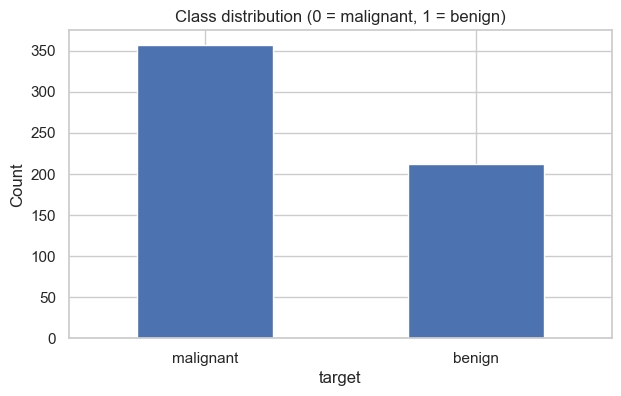

In [7]:
class_counts = df['target'].value_counts()
print(class_counts)

plt.figure()
class_counts.plot(kind='bar')
plt.xticks(ticks=[0,1], labels=data.target_names, rotation=0)
plt.title('Class distribution (0 = malignant, 1 = benign)')
plt.ylabel('Count')
plt.show()

### 3. Simple Feature Visualization

Let us plot one feature against the target to see if there is visible separation.

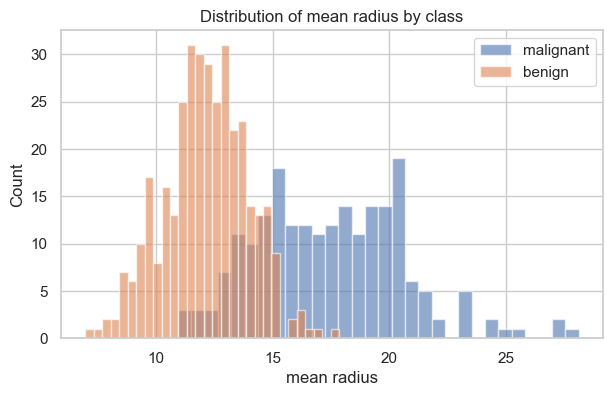

In [13]:
feature_name = 'mean radius'
feat_idx = list(data.feature_names).index(feature_name)
plt.figure()
plt.hist(X[y==0][:, feat_idx], bins=30, alpha=0.6, label='malignant')
plt.hist(X[y==1][:, feat_idx], bins=30, alpha=0.6, label='benign')
plt.legend()
plt.xlabel(feature_name)
plt.ylabel('Count')
plt.title(f'Distribution of {feature_name} by class')
plt.show()

### 4. Train–Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (426, 30)
Test set shape: (143, 30)


### 5. Train Gaussian Naive Bayes

In [19]:
## Model
gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

### 6. Predictions and Accuracy

In [21]:
# pred

y_pred = gnb.predict(X_test)
acc= accuracy_score(y_test, y_pred)
print("Accuracy on test set: ", acc)

Accuracy on test set:  0.9370629370629371


### 7. Confusion Matrix

Confusion matrix:
 [[46  7]
 [ 2 88]]


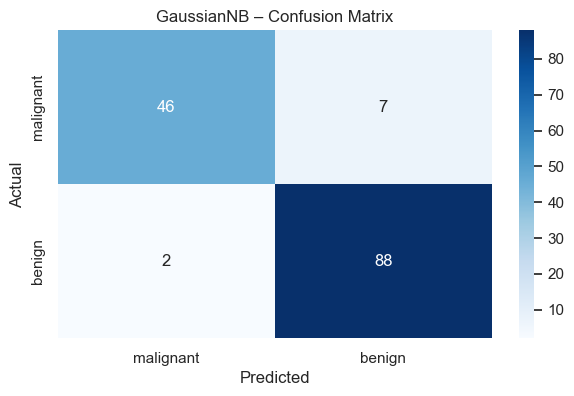

In [23]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('GaussianNB – Confusion Matrix')
plt.show()

### 8. Classification Report

In [25]:
print(classification_report(y_test, y_pred, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.96      0.87      0.91        53
      benign       0.93      0.98      0.95        90

    accuracy                           0.94       143
   macro avg       0.94      0.92      0.93       143
weighted avg       0.94      0.94      0.94       143



### 9. Short Interpretation

- `precision` for malignant tells us: out of all samples predicted as malignant, how many were actually malignant.
- `recall` for malignant tells us: out of all truly malignant cases, how many we correctly caught.
- In medical tasks, **recall for malignant** is very important (missing a cancer case is risky).
- Naive Bayes uses **mean and variance** of each feature per class under the Gaussian assumption.


## Part B – Multinomial Naive Bayes on Text Data

Now we move to a **text classification** setting, where Naive Bayes is very powerful.
We will first use a tiny custom dataset for intuition, then show how to scale to a larger dataset.


### 1. Tiny Custom Sentiment Dataset

In [60]:
texts = [
    'I love this product',
    'This is amazing and fantastic',
    'I really like this',
    'Fantastic Experience',
    'I hate this item',
    'This is the worst thing ever',
    'Horrible and terrible experience',
    'Horrible experience',
    'Horrible and Terrible',
]
labels = [1, 1, 1,1, 0, 0, 0, 0, 0]  # 1 = positive, 0 = negative

toy_df = pd.DataFrame({'text': texts, 'label': labels})
toy_df

,text,label
0,I love this product,1
1,This is amazing and fantastic,1
2,I really like this,1
3,Fantastic Experience,1
4,I hate this item,0
5,This is the worst thing ever,0
6,Horrible and terrible experience,0
7,Horrible experience,0
8,Horrible and Terrible,0


### 2. Convert Text to Features with CountVectorizer

In [63]:
vectorizer = CountVectorizer()
X_toy = vectorizer.fit_transform(toy_df['text'])
y_toy = toy_df['label']

print("Feature matrix shape: ", X_toy.shape)
print("Vocabulary: ", vectorizer.get_feature_names_out() )

Feature matrix shape:  (9, 18)
Vocabulary:  ['amazing' 'and' 'ever' 'experience' 'fantastic' 'hate' 'horrible' 'is'
 'item' 'like' 'love' 'product' 'really' 'terrible' 'the' 'thing' 'this'
 'worst']


### 3. Train MultinomialNB on Tiny Dataset

In [66]:
mnb_toy = MultinomialNB()
mnb_toy.fit(X_toy, y_toy)

y_toy_pred = mnb_toy.predict(X_toy)

print("Accuracy on tiny dataset:", accuracy_score(y_toy, y_toy_pred))
print("classification report :\n", classification_report(y_toy, y_toy_pred))

Accuracy on tiny dataset: 1.0
classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



### 4. Try New Sentences

In [71]:
new_texts = [
    'I love it',
    'This product is horrible',
    'Fantastic and Mindblowing Experience',
    'Worst purchase ever'
]
X_new = vectorizer.transform(new_texts)
new_pred = mnb_toy.predict(X_new)
for txt, pred in zip(new_texts, new_pred):
    label_str = 'positive' if pred == 1 else 'negative'
    print(f'{txt!r} -> {label_str}')

'I love it' -> positive
'This product is horrible' -> negative
'Fantastic and Mindblowing Experience' -> positive
'Worst purchase ever' -> negative


### 5. Scaling Up: 20 Newsgroups Subset

Now we use a **subset** of the classic 20 Newsgroups dataset.
We choose three categories to keep it manageable:
- `comp.graphics`
- `rec.sport.baseball`
- `sci.med`

This shows how the exact same Naive Bayes idea scales to real text classification.


In [73]:
from sklearn.datasets import fetch_20newsgroups

categories = ['comp.graphics', 'rec.sport.baseball', 'sci.med']

newsgroups = fetch_20newsgroups(
    subset = 'train',
    categories=categories,
    remove=('headers', 'footers', 'quotes'),
    shuffle=True,
    random_state=42
)

In [77]:
df_news = pd.DataFrame({
    'text': newsgroups.data,
    'label': newsgroups.target
})
df_news.head()

,text,label
0,"\nThe FDA, I believe. Rules say no blood or b...",2
1,,2
2,It would be nice to think that individuals can...,2
3,"Ok all you trivia buffs, I have a good one for...",1
4,"Please , I need the starting address (pointer)...",0


In [79]:
print('Number of documents:', len(newsgroups.data))
print('Target names:', newsgroups.target_names)

Number of documents: 1775
Target names: ['comp.graphics', 'rec.sport.baseball', 'sci.med']


In [81]:
X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(
    df_news['text'], df_news['label'], test_size=0.25, random_state=42
)

print('Train size:', X_train_text.shape[0])
print('Test size:', X_test_text.shape[0])

Train size: 1331
Test size: 444


In [95]:
vectorizer_news = CountVectorizer(stop_words='english', max_features=3000)
X_train_counts = vectorizer_news.fit_transform(X_train_text)
X_test_counts = vectorizer_news.transform(X_test_text)

print('Shape of X_train_counts:', X_train_counts.shape)
print('Shape of X_test_counts:', X_test_counts.shape)

Shape of X_train_counts: (1331, 3000)
Shape of X_test_counts: (444, 3000)


In [97]:
mnb_news = MultinomialNB()
mnb_news.fit(X_train_counts, y_train_text)
print('MultinomialNB model trained on news data.')

MultinomialNB model trained on news data.


Accuracy on 20 Newsgroups subset: 0.918918918918919
Confusion matrix:
 [[132   5   6]
 [  6 132   9]
 [  4   6 144]]


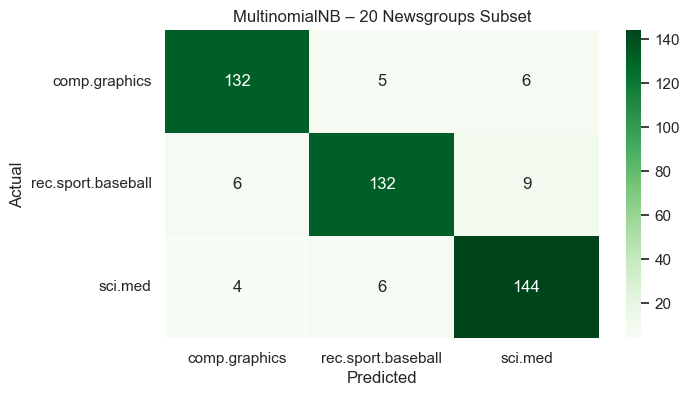

Classification report:
                    precision    recall  f1-score   support

     comp.graphics       0.93      0.92      0.93       143
rec.sport.baseball       0.92      0.90      0.91       147
           sci.med       0.91      0.94      0.92       154

          accuracy                           0.92       444
         macro avg       0.92      0.92      0.92       444
      weighted avg       0.92      0.92      0.92       444



In [99]:
y_news_pred = mnb_news.predict(X_test_counts)
acc_news = accuracy_score(y_test_text, y_news_pred)
print('Accuracy on 20 Newsgroups subset:', acc_news)

cm_news = confusion_matrix(y_test_text, y_news_pred)
print('Confusion matrix:\n', cm_news)

sns.heatmap(cm_news, annot=True, fmt='d', cmap='Greens',
            xticklabels=newsgroups.target_names,
            yticklabels=newsgroups.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('MultinomialNB – 20 Newsgroups Subset')
plt.show()

print('Classification report:')
print(classification_report(y_test_text, y_news_pred,
                            target_names=newsgroups.target_names))

## Summary

In this notebook we have seen how to:

**Numeric data (GaussianNB):**
- Load a real dataset (breast cancer)
- Explore class balance and simple feature distributions
- Train a Gaussian Naive Bayes model
- Evaluate with accuracy, confusion matrix, and classification report

**Text data (MultinomialNB):**
- Build a tiny custom sentiment dataset for intuition
- Use `CountVectorizer` to convert text into word count features
- Train `MultinomialNB` and test on new sentences
- Scale the same idea to a real text dataset (20 Newsgroups subset)
- Evaluate performance on multi class text classification
